In [1]:
import seaborn as sns
import pandas as pd
import os
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    make_scorer,
)
import joblib
import numpy as np

In [2]:
classifier = joblib.load("analysis/lgb.pkl")

In [3]:
new_data = pd.read_csv(f"three_state_pt3.csv")
new_data = new_data.drop(columns="Unnamed: 0")
new_data = new_data.sample(frac=1, random_state=42).reset_index(drop=True)
new_data_test = new_data.drop(columns="label")
new_data_label = new_data["label"]
# Predict on test set
new_pred = classifier.predict(new_data_test)
print(confusion_matrix(new_data["label"], new_pred, normalize="true"))

[[0.96328889 0.02391111 0.0128    ]
 [0.20004444 0.76175556 0.0382    ]
 [0.11755556 0.14746667 0.73497778]]


In [4]:
new_data_test.head()

,I1,Q1,I2,Q2
0,1539.239640,-7460.770746,-473.319789,-3903.068344
1,1457.801075,-7156.984014,-1120.560473,-2797.703287
2,4498.903326,-5626.029705,-505.941892,-1540.621991
3,5969.914974,-8190.407951,4506.905538,-1214.909709
4,2008.479515,-8940.929768,-2299.207986,-3370.158008


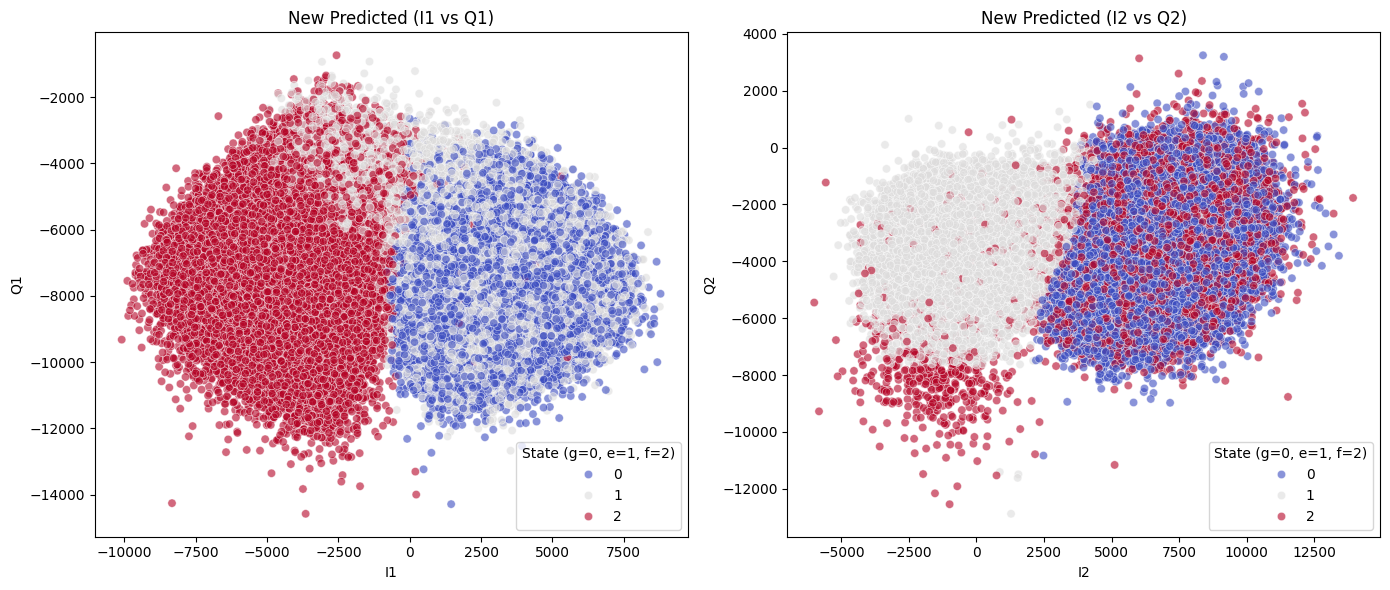

In [5]:
# Convert test data into a DataFrame for easier plotting
new_test_df = pd.DataFrame(new_data, columns=["I1", "Q1", "I2", "Q2", "label"])
new_test_df["predicted"] = (
    new_pred  # Add predicted labels # Create subplots (1 row, 2 columns)
)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: I1 vs Q1
sns.scatterplot(
    data=new_test_df,
    x="I1",
    y="Q1",
    hue="predicted",
    palette="coolwarm",
    alpha=0.6,
    ax=axes[0],
)
axes[0].set_xlabel("I1")
axes[0].set_ylabel("Q1")
axes[0].set_title("New Predicted (I1 vs Q1)")
axes[0].legend(title="State (g=0, e=1, f=2)")

# Second subplot: I2 vs Q2
sns.scatterplot(
    data=new_test_df,
    x="I2",
    y="Q2",
    hue="predicted",
    palette="coolwarm",
    alpha=0.6,
    ax=axes[1],
)
axes[1].set_xlabel("I2")
axes[1].set_ylabel("Q2")
axes[1].set_title("New Predicted (I2 vs Q2)")
axes[1].legend(title="State (g=0, e=1, f=2)")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()